In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data = pd.read_csv("../data/data.csv")

In [121]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


## Column description

1. **CRIM** - per capita crime rate by town
2. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
3. **INDUS** - proportion of non-retail business acres per town
4. **CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX** - nitric oxides concentration (parts per 10 million)
6. **RM** - average number of rooms per dwelling
7. **AGE** - proportion of owner-occupied units built prior to 1940
8. **DIS** - weighted distances to five Boston employment centres
9. **RAD** - index of accessibility to radial highways
10. **TAX** - full-value property-tax rate per \$10,000

11. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks
by town
13. **LSTAT** -  % lower status of the population
14. **MEDV** - Median value of owner-occupied homes in $1000's

In [122]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.287589,0.703802,3.56100,5.885500,6.20900,6.629750,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


We can see that RM has 5 null values, we will fill that value with the mean of the columns RM.

In [124]:
# sns.pairplot(data)

In [126]:
Y = data.MEDV
data = data.drop(columns=['MEDV'])

In [127]:
mean_value = data['RM'].mean()
 
data['RM'].fillna(value=mean_value, inplace=True)

In [128]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,511.0,3.584139,8.564433,0.00632,0.082325,0.26169,3.621175,88.9762
ZN,511.0,11.252446,23.234838,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,511.0,11.151096,6.828175,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,511.0,0.068493,0.252838,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,511.0,0.554757,0.115310,0.38500,0.449000,0.53800,0.624000,0.8710
RM,511.0,6.287589,0.700343,3.56100,5.887500,6.21100,6.627000,8.7800
AGE,511.0,68.616243,28.099130,2.90000,45.050000,77.30000,94.050000,100.0000
DIS,511.0,3.783876,2.098631,1.12960,2.100350,3.15230,5.118000,12.1265
RAD,511.0,9.485323,8.688469,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,511.0,407.440313,167.903532,187.00000,279.500000,330.00000,666.000000,711.0000


In [129]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [130]:
data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.59615385e-01, 1.00000000e+00, 4.37592568e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.00000000e-01, 1.00000000e+00, 9.97711054e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.00000000e-01, 9.89737254e-01, 3.09680894e-02],
       ...,
       [4.92312679e-03, 0.00000000e+00, 4.41348974e-01, ...,
        1.00000000e+00, 8.64087952e-01, 2.59458732e-01],
       [8.66933843e-03, 0.00000000e+00, 4.48680352e-01, ...,
        1.00000000e+00, 8.64087952e-01, 1.00000000e+00],
       [7.28336376e-03, 0.00000000e+00, 4.52346041e-01, ...,
        1.00000000e+00, 8.08613647e-01, 5.82604012e-01]])

## Neural network

In [131]:
X = data

In [132]:
Y.shape

(511,)

In [133]:
X.shape 

(511, 13)

In [134]:
X[:10]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.59615385e-01, 1.00000000e+00,
        4.37592568e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.00000000e-01, 1.00000000e+00,
        9.97711054e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.00000000e-01, 9.89737254e-01,
        3.09680894e-02],
       [2.92795719e-04, 0.00000000e+00, 6.30498534e-02, 0.00000000e+00,
        1.50205761e-01, 6.58555279e-01, 4.41812564e-01, 4.48544590e-01,
        8.69565217e-02, 6.67938931e-02, 5.86538462e-01, 9.94276060e-01,
        1.62919079e-02],
       [7.05070075e-04, 0.00000000e+

In [135]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Sequential

In [162]:
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1))

optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [163]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 64)                896       
                                                                 
 dense_136 (Dense)           (None, 64)                4160      
                                                                 
 dense_137 (Dense)           (None, 8)                 520       
                                                                 
 dense_138 (Dense)           (None, 4)                 36        
                                                                 
 dense_139 (Dense)           (None, 1)                 5         
                                                                 
Total params: 5617 (21.94 KB)
Trainable params: 5617 (21.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [164]:
history = model.fit(X, Y, batch_size=32, epochs=200, validation_split=0.3)

Epoch 1/200
12/12 [==============================] - 1s 15ms/step - loss: 683.7951 - val_loss: 374.5387
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 659.1937 - val_loss: 347.3034
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 617.0784 - val_loss: 297.3370
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 541.5710 - val_loss: 216.6890
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 412.9204 - val_loss: 119.5989
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 238.5058 - val_loss: 127.3781
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 107.3201 - val_loss: 391.6622
Epoch 8/200
12/12 [==============================] - 0s 5ms/step - loss: 92.6267 - val_loss: 416.8553
Epoch 9/200
12/12 [==============================] - 0s 5ms/step - loss: 84.9962 - val_loss: 297.1216
Epoch 10/200
12/12 [==============================] - 0s 5ms/step - loss: 

12/12 [==============================] - 0s 5ms/step - loss: 8.1433 - val_loss: 97.3161
Epoch 82/200
12/12 [==============================] - 0s 4ms/step - loss: 8.3514 - val_loss: 98.9693
Epoch 83/200
12/12 [==============================] - 0s 4ms/step - loss: 8.2800 - val_loss: 98.7457
Epoch 84/200
12/12 [==============================] - 0s 4ms/step - loss: 7.8206 - val_loss: 96.6614
Epoch 85/200
12/12 [==============================] - 0s 5ms/step - loss: 7.7444 - val_loss: 97.7133
Epoch 86/200
12/12 [==============================] - 0s 5ms/step - loss: 7.8327 - val_loss: 97.4965
Epoch 87/200
12/12 [==============================] - 0s 5ms/step - loss: 7.7265 - val_loss: 98.5481
Epoch 88/200
12/12 [==============================] - 0s 5ms/step - loss: 7.8956 - val_loss: 97.4739
Epoch 89/200
12/12 [==============================] - 0s 4ms/step - loss: 7.7042 - val_loss: 99.1090
Epoch 90/200
12/12 [==============================] - 0s 5ms/step - loss: 7.7012 - val_loss: 99.7198
Epo

12/12 [==============================] - 0s 5ms/step - loss: 5.9056 - val_loss: 98.5341
Epoch 162/200
12/12 [==============================] - 0s 5ms/step - loss: 5.9096 - val_loss: 100.6276
Epoch 163/200
12/12 [==============================] - 0s 5ms/step - loss: 6.1895 - val_loss: 103.6686
Epoch 164/200
12/12 [==============================] - 0s 5ms/step - loss: 6.2407 - val_loss: 103.6234
Epoch 165/200
12/12 [==============================] - 0s 4ms/step - loss: 6.9110 - val_loss: 96.8230
Epoch 166/200
12/12 [==============================] - 0s 4ms/step - loss: 5.9251 - val_loss: 99.4911
Epoch 167/200
12/12 [==============================] - 0s 4ms/step - loss: 5.7981 - val_loss: 95.9571
Epoch 168/200
12/12 [==============================] - 0s 5ms/step - loss: 5.9373 - val_loss: 99.7021
Epoch 169/200
12/12 [==============================] - 0s 5ms/step - loss: 5.7488 - val_loss: 99.7680
Epoch 170/200
12/12 [==============================] - 0s 4ms/step - loss: 5.8154 - val_loss:

In [165]:
model.predict(X[3].reshape(1,13))

1/1 [==============================] - 0s 66ms/step


array([[30.471714]], dtype=float32)

In [166]:
Y[3]

33.4

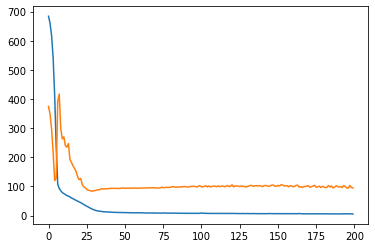

In [167]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()